**Review Image Basics:**    

1. An medical image occupy a bounded region in the physical space which is defined by:
  * Origin (physical coordinate of the first image pixel).
  * Size (number of pixels per direction).
  * Spacing (pixel size per direction, unit: mm).
  * Direction cosine matrix (axis directions in physical space).
  
These attributes are the image's meta-data. Computing the physical coordinates from image indexes requires all four   components.

2. Image initialization: user specified pixel type, user specified dimensionality (2,3), origin at zero, unit spacing in all dimensions and identity direction cosine matrix, intensities set to zero.

3. Data transfer to/from numpy: GetArrayFromImage (copy), GetImageFromArray (copy) + set the meta-data yourself.


**Review Image Resampling:**   

Image resampling is the action of sampling an image, which itself is a sampling of an original continuous signal.

Generally speaking, resampling in SimpleITK involves four components:
1. Image - the image we resample, given in coordinate system $m$.
2. Reference image - an image with the coordinate system $f$ to which the input image will be mapped.
2. Pullback transformation $T_f^m$ - maps points from coordinate system $f$ to coordinate system $m$, $^mp = T_f^m(^fp)$.
3. Interpolator - method for obtaining the intensity values at arbitrary points in coordinate system $m$ from the values of the points defined by the Image.


While SimpleITK provides a large number of interpolation methods, the two most commonly used are ```sitkLinear``` and ```sitkNearestNeighbor```. The former is used for most interpolation tasks, a compromise between accuracy and computational efficiency. The later is used to interpolate labeled images representing a segmentation, it is the only interpolation approach which will not introduce new labels (i.e., pixel instensity values) into the result.

In [1]:
!pip install SimpleITK
!pip install nibabel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.4/52.4 MB 10.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
### Load neccessary libraries
import SimpleITK as sitk
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

<h1 align="center">Part 1: Image Basics</h1>

Write your own code for the following tasks.

1.1 Read the CT image named "CTChest.nii.gz".

1.2 Print the following attributes of the CT image, origin, size, spacing,direction, and pixel type.

1.3 Print the intensity value of the pixel (100,100,100), and set its intensity value to 1000.

1.4 Get Python array from the image and print the minimum and maximum intensity values of the image.

1.5 Rescale the intensity of the image to the range [0,255] by using min-max normalization.

1.6 Randomly select and show a 2D image slice for each of the axial, coronal, and sagittal views.

1.7 Bonus question: Set the intensity of all pixels in the median plane to 0. Save the modified image in the .nii.gz format to the disk, ensuring it retains the same physical coordinate system as the input CT image.


In [22]:
# Your code for 1.1 (1 point)

#1.1 Read the CT image named "CTChest.nii.gz".
img = sitk.ReadImage('/content/drive/MyDrive/medicalAI/CTChest.nii.gz')

shape :  (139, 512, 512)
Origin :  (-195.0, -171.6999969482422, -347.75)
Size :  (512, 512, 139)
Spacing :  (0.7617189884185791, 0.7617189884185791, 2.5)
Direction :  (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel type :  32-bit signed integer


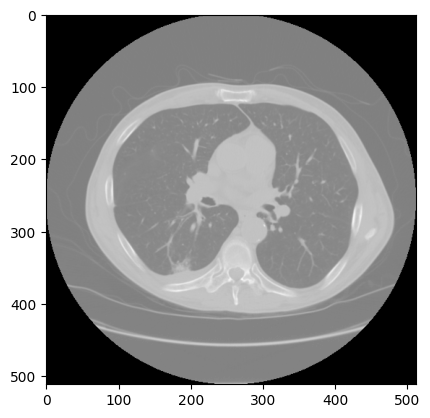

In [23]:
# Your code for 1.2 (2 point)

#1.2 Print the following attributes of the CT image, origin, size, spacing,direction, and pixel type.
img_array = sitk.GetArrayFromImage(img)
print("shape : ",img_array.shape)
plt.imshow(img_array[80,:,:],cmap='gray')
print('Origin : ',img.GetOrigin())
print('Size : ',img.GetSize())
print('Spacing : ',img.GetSpacing())
print('Direction : ', img.GetDirection())
print('Pixel type : ',img.GetPixelIDTypeAsString())

In [7]:
# Your code for 1.3 (2 points)

#1.3 Print the intensity value of the pixel (100,100,100), and set its intensity value to 1000.

#CT는 HounseField 값을 가지기 때문

#이미지 데이터에서 좌표 (100, 100, 100)에 해당하는 픽셀 또는 복셀의 강도 값(intensity value)을 가져옴
img.GetPixel(100,100,100)
print(img.GetPixel(100,100,100))

#좌표 (100, 100, 100)에 해당하는 픽셀의 강도 값을 1000으로 설정
img.SetPixel(100,100,100,1000)
print(img.GetPixel(100,100,100))

-984
1000


In [8]:
# Your code for 1.4 (2 points)

#1.4 Get Python array from the image and print the minimum and maximum intensity values of the image.

img_array = sitk.GetArrayFromImage(img)

print(img_array.min())

print(img_array.max())

#min : -3024, max : 3071

-3024
3071


In [79]:
# Your code for 1.5 (2 points)

#1.5 Rescale the intensity of the image to the range [0,255] by using min-max normalization.
img_min = img_array.min()
img_max = img_array.max()

img_scaled = (img_array - img_min) / (img_max - img_min) * 255
img_scaled = img_scaled.astype(np.uint8) #정수형으로 변환(0~255 픽셀에 맞게 uint8로 변환)
print(img_scaled.min(), img_scaled.max())

#z-normalization
img_scaled_2 = (img_array - img_array.mean()) / img_array.std() * 255
img_scaled_2 = img_scaled_2.astype(np.uint8)
print(img_scaled_2.min(), img_scaled_2.max())

0 255
0 255


(139, 512, 512)


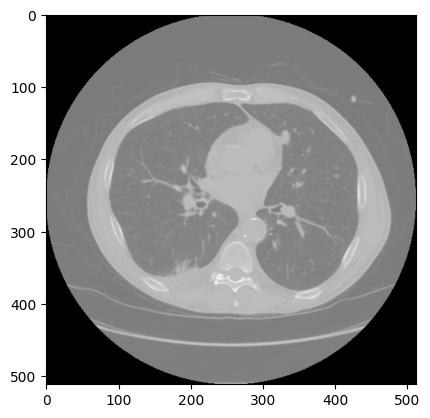

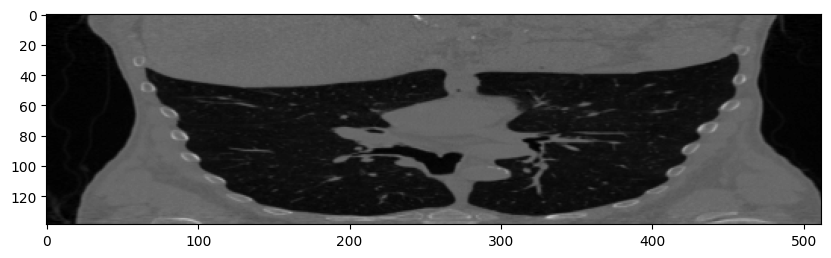

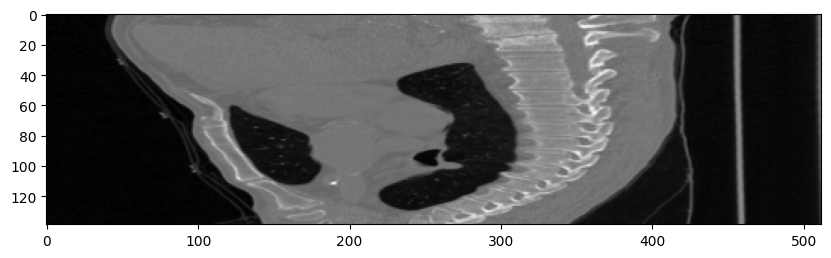

In [80]:
# Your code for 1.6 (2 points)

#1.6 Randomly select and show a 2D image slice for each of the axial, coronal, and sagittal views.

print(img_scaled.shape)

#axial
plt.imshow(img_scaled[75,:,:],cmap='gray')

#coronal
plt.figure(figsize=(10,5))
plt.imshow(img_scaled[:,250,:],cmap='gray')

#sagittal
plt.figure(figsize=(10,5))
plt.imshow(img_scaled[:,:,250],cmap='gray')

In [25]:
# Your code for 1.7 (bonus queston, optional, 2 points)

#1.7 Bonus question: Set the intensity of all pixels in the median plane to 0.
#Save the modified image in the .nii.gz format to the disk,
#ensuring it retains the same physical coordinate system as the input CT image.

#median을 지나는 origin 축 자세를 0으로 만들어버리도록(세 축 전부 적용해야 함)
print(img_array.shape)

img_array[139//2,:,:] = 0
img_array[:,512//2,:] = 0
img_array[:,:,512//2] = 0

modified = sitk.GetImageFromArray(img_array)

sitk.WriteImage(modified, 'outcome_image_2.nii.gz')



(139, 512, 512)


<h1 align="center">Image Resampling</h1>

Write your own code for the following tasks.

2.1 Use SimpleITK to read the logo image named "SimpleITK_Logo.png" and print image attributes, including origin, size, spacing, direction, and pixel type.

2.2 Use the input logo image as the reference image, and rotate the logo image clockwise by 45 degrees around the point (0,0). Plot the input and rotated images side by side. (Hint: you can use sitk.Euler2DTransform())

2.4 Use the input image as the reference image, and rotate the logo image counterclockwise by 90 degrees around the center of the image. Plot the input and rotated images side by side.

2.5 Create a reference image with dimensions three times larger than the input image, i.e., changing the image size from HxW to 3Hx3W. (Hint: use sitk.Image())

2.6 Set the spacing of this reference image to be the same as the original image, and set the origin of the reference image properly, so that the origin of the reference image corresponds to the physical coordinates of the lower right pixel in the input image, i.e., pixel with index (H,W).

2.7 Use this new image as the reference image, and rotate the logo image clockwise by 45 degrees around the point (0,0). Plot the input and rotated images side by side.

2.8 Bonus question: Based on the results above, how will the reference image affect the resampled image? Does the resampled image and the reference image have the same physical coordinate system?


(1142, 1142, 3)
origin :  (0.0, 0.0)
dimension :  2
size :  (1142, 1142)
spacing :  (1.0, 1.0)
direction :  (1.0, 0.0, 0.0, 1.0)
pixel type :  vector of 8-bit unsigned integer


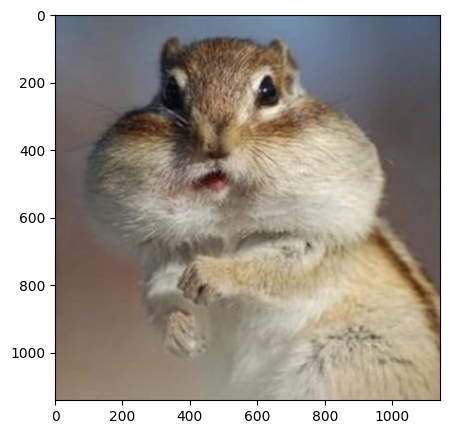

In [11]:
# Your code for 2.1 (1 point)

#2.1 Use SimpleITK to read the logo image named "SimpleITK_Logo.png" and print image attributes,
#including origin, size, spacing, direction, and pixel type.
from PIL import Image
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import cv2

#img = cv2.imread("/content/drive/MyDrive/medicalAI/SimpleITK_Logo.png")
#sitk_img = sitk.GetImageFromArray(img)
#print(sitk_img.GetSize())

img = Image.open("/content/drive/MyDrive/medicalAI/SimpleITK_Logo.jpg")

img_array = np.array(img)
print(img_array.shape)

plt.figure(figsize=(10,5))
plt.imshow(img_array)
#plt.imshow(img_array[:,:,0], cmap='Reds') #원본 Red 채널
#plt.imshow(img_array[:,:,1], cmap='Greens') #원본 Green 채널

#png같은 일반적인 이미지 형식은 ReadImage로 직접 읽을 수 없음
sitk_img = sitk.ReadImage("/content/drive/MyDrive/medicalAI/SimpleITK_Logo.jpg")

print("origin : ", sitk_img.GetOrigin())
print("dimension : ", sitk_img.GetDimension())
print("size : ",sitk_img.GetSize()) #3D, 해상도 : 1142,1142
print("spacing : ",sitk_img.GetSpacing())
print("direction : ", sitk_img.GetDirection())
print("pixel type : ",sitk_img.GetPixelIDTypeAsString())

img_array = sitk.GetArrayFromImage(sitk_img)

#plt.imshow(img_array)


(1142, 1142, 3)
(1142, 1142, 3)


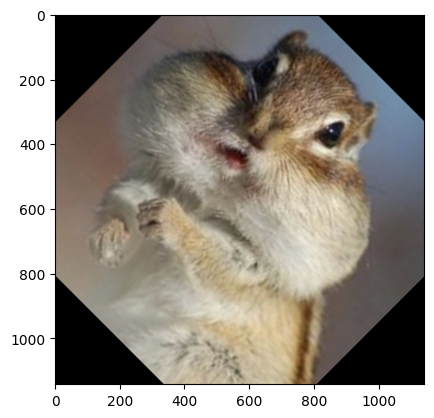

In [42]:
# Your code for 2.2 (2 point)
# Transformer

#2.2 Use the input logo image as the reference image, and rotate the logo image clockwise by 45 degrees around the point (0,0).
#Plot the input and rotated images side by side. (Hint: you can use sitk.Euler2DTransform())

sitk_img = sitk.ReadImage("/content/drive/MyDrive/medicalAI/SimpleITK_Logo.jpg")

transform = sitk.Euler2DTransform((1142 // 2,1142 // 2), -np.pi/4)
rotated_img = sitk.Resample(sitk_img, sitk_img, transform, sitk.sitkLinear, 0.0)

img_array = sitk.GetArrayFromImage(sitk_img)
rotated_array = sitk.GetArrayFromImage(rotated_img)

print(img_array.shape)
print(rotated_array.shape)

plt.imshow(rotated_array)


(1142, 1142, 3)
(1142, 1142, 3)


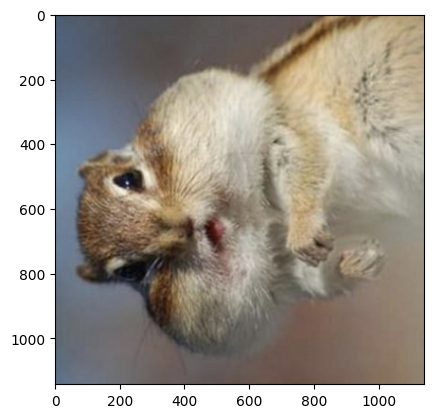

In [43]:
# Your code for 2.4 (2 point)
# Transformer

#2.4 Use the input image as the reference image, and rotate the logo image counterclockwise by 90 degrees around the center of the image.
#Plot the input and rotated images side by side.

sitk_img = sitk.ReadImage("/content/drive/MyDrive/medicalAI/SimpleITK_Logo.jpg")

transform = sitk.Euler2DTransform((1142 // 2,1142 // 2), np.pi/2)
rotated_img = sitk.Resample(sitk_img, sitk_img, transform, sitk.sitkLinear, 0.0)

img_array = sitk.GetArrayFromImage(sitk_img)
rotated_array = sitk.GetArrayFromImage(rotated_img)

print(img_array.shape)
print(rotated_array.shape)

plt.imshow(rotated_array)


(3426, 3426, 3)


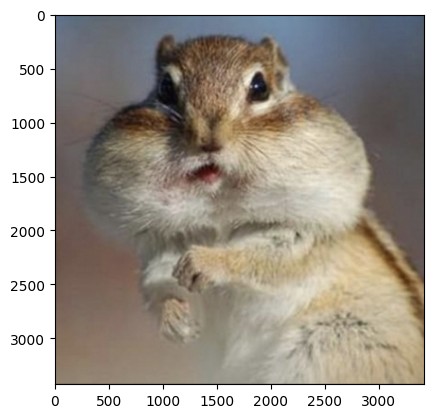

In [87]:
# Your code for 2.5 (2 points)

#2.5 Create a reference image with dimensions three times larger than the input image,
#i.e., changing the image size from HxW to 3Hx3W. (Hint: use sitk.Image())

sitk_img = sitk.ReadImage("/content/drive/MyDrive/medicalAI/SimpleITK_Logo.jpg")


scaled_img = sitk.Image((1142 * 3, 1142 * 3), sitk_img.GetPixelIDValue(), 3)#logo의 pixelvalue
scaled_img.SetSpacing((1.0 / 3 , 1.0 / 3))
scaled_img.SetOrigin(sitk_img.GetOrigin())
scaled_img.SetDirection(sitk_img.GetDirection())

scaled_img = sitk.Resample(sitk_img, scaled_img)

scaled_array = sitk.GetArrayFromImage(scaled_img)

print(scaled_array.shape)

plt.imshow(scaled_array)

In [12]:
# Your code for 2.6 (2 points)

#2.6 Set the spacing of this reference image to be the same as the original image, and set the origin of the reference
#image properly, so that the origin of the reference image corresponds to the physical
#coordinates of the lower right pixel in the input image, i.e., pixel with index (H,W).


#1. 참조 이미지의 spacing을 원본 이미지의 spacing과 동일하게 설정

sitk_img = sitk.ReadImage("/content/drive/MyDrive/medicalAI/SimpleITK_Logo.jpg")

original_spacing = sitk_img.GetSpacing()
original_origin = sitk_img.GetOrigin()
original_size = sitk_img.GetSize()
original_direction = sitk_img.GetDirection()

print(original_spacing)
print(original_origin)
print(original_size)

reference_img = sitk.Image(original_size, sitk_img.GetPixelID())

reference_img.SetSpacing(original_spacing)
reference_img.SetOrigin(original_origin)
reference_img.SetDirection(original_direction)

print(reference_img.GetOrigin())
print(reference_img.GetSpacing())
print(reference_img.GetDirection())

#2. 참조 이미지의 origin을 물리적 좌표계에서 원본 이미지의 하단 오른쪽 픽셀의 위치에 맞게 설정

reference_img.SetOrigin((1142,0))

print(reference_img.GetOrigin())
print(reference_img.GetSpacing())
print(reference_img.GetDirection())

(1.0, 1.0)
(0.0, 0.0)
(1142, 1142)
(0.0, 0.0)
(1.0, 1.0)
(1.0, 0.0, 0.0, 1.0)
(1142.0, 0.0)
(1.0, 1.0)
(1.0, 0.0, 0.0, 1.0)


(1142, 1142, 2)
(1142, 1142, 3)


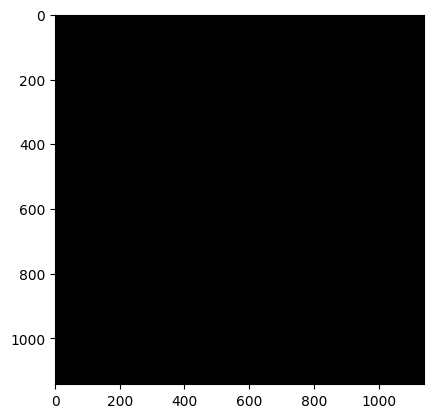

In [17]:
# Your code for 2.7 (3 points)
# Transformer

#2.7 Use this new image as the reference image,
#and rotate the logo image clockwise by 45 degrees around the point (0,0). Plot the input and rotated images side by side.

#center를 0,0으로 기준점 삼아 돌리기(안 나오는 게 맞음)
transform = sitk.Euler2DTransform((0,0), -np.pi/4)
rotated_img = sitk.Resample(sitk_img, reference_img, transform, sitk.sitkLinear, 0.0)

img_array = sitk.GetArrayFromImage(reference_img)
rotated_array = sitk.GetArrayFromImage(rotated_img)

print(img_array.shape)
print(rotated_array.shape)

plt.imshow(rotated_array)

#### Question 2.8
The reference image has a different origin compared to the original image, and because the resampling (rotation) was performed with respect to the reference image, the reference image had an impact on the resampled image.
And yes, Both the resampled image and the reference image have the same physical coordinate system since we set the spacing and origin of the reference to match.

In [ ]:
#2.8 Bonus question: Based on the results above, how will the reference image affect the resampled image?
# Does the resampled image and the reference image have the same physical coordinate system?



#reference image decides physical corrdinates(spacing, direction, origin)

#reference image has a origin with (1142,0), but original imags has a origin with (0,0). so, two image have different physical coordinate system